In [1]:
import pandas as pd 
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.fftpack import fft, fftfreq
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df_train_time_series = pd.read_csv('train_time_series.csv')
df_train_labels = pd.read_csv('train_labels.csv')
df_questions_time_series = pd.read_csv('test_time_series.csv')
df_questions_labels = pd.read_csv('test_labels.csv')
df_train_time_series.columns = ['row_id','timestamp','UTC_time','accuracy','x_axis','y_axis','z_axis']
df_train_labels.columns = ['row_id','timestamp','UTC_time','label']
df_train_labels = df_train_labels.drop(['timestamp', 'UTC_time'], axis=1)
df_questions_time_series.columns = ['row_id','timestamp','UTC_time','accuracy','x_axis','y_axis','z_axis']
df_questions_labels.columns = ['row_id','timestamp','UTC_time','label']
df_questions_labels_paint = df_questions_labels.drop(['timestamp', 'UTC_time'], axis=1)

In [3]:
df_train_time_series

,row_id,timestamp,UTC_time,accuracy,x_axis,y_axis,z_axis
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450
...,...,...,...,...,...,...,...
3739,24325,1565110305638,2019-08-06T16:51:45.638,unknown,0.024384,-0.710709,0.030304
3740,24326,1565110305738,2019-08-06T16:51:45.738,unknown,0.487228,-1.099136,-0.015213
3741,24327,1565110305838,2019-08-06T16:51:45.838,unknown,0.369446,-0.968506,0.036713
3742,24328,1565110305939,2019-08-06T16:51:45.939,unknown,0.167877,-0.802826,0.049805


In [4]:
df_train_labels

,row_id,label
0,20589,1
1,20599,1
2,20609,1
3,20619,1
4,20629,1
...,...,...
370,24289,4
371,24299,4
372,24309,4
373,24319,4


In [5]:
df_questions_time_series

,row_id,timestamp,UTC_time,accuracy,x_axis,y_axis,z_axis
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550
...,...,...,...,...,...,...,...
1245,25575,1565110430975,2019-08-06T16:53:50.975,unknown,0.036499,-0.724823,0.553802
1246,25576,1565110431075,2019-08-06T16:53:51.075,unknown,-0.159241,0.307022,0.142410
1247,25577,1565110431175,2019-08-06T16:53:51.175,unknown,-0.037964,-0.673706,1.065445
1248,25578,1565110431275,2019-08-06T16:53:51.275,unknown,0.255707,-1.485397,-0.013336


In [6]:
df_questions_labels

,row_id,timestamp,UTC_time,label
0,24339,1565110307041,2019-08-06T16:51:47.041,NaN
1,24349,1565110308043,2019-08-06T16:51:48.043,NaN
2,24359,1565110309046,2019-08-06T16:51:49.046,NaN
3,24369,1565110310048,2019-08-06T16:51:50.048,NaN
4,24379,1565110311050,2019-08-06T16:51:51.050,NaN
...,...,...,...,...
120,25539,1565110427366,2019-08-06T16:53:47.366,NaN
121,25549,1565110428369,2019-08-06T16:53:48.369,NaN
122,25559,1565110429371,2019-08-06T16:53:49.371,NaN
123,25569,1565110430373,2019-08-06T16:53:50.373,NaN


In [7]:
df_train= pd.merge(left=df_train_time_series,right=df_train_labels, left_on='row_id', right_on='row_id', how='left')

label_def=1
for i in range(0,df_train.shape[0]):
    if df_train.label.loc[i]>0:
        df_train.label.iloc[i]=df_train.label.loc[i]
        label_def=df_train.label.loc[i]
    else:
        df_train.label.iloc[i]=label_def

df_questions= pd.merge(left=df_questions_time_series,right=df_questions_labels_paint, left_on='row_id', right_on='row_id', how='left')

In [8]:
df_train_1=df_train[df_train.label==1]
df_train_2=df_train[df_train.label==2]
df_train_3=df_train[df_train.label==3]
df_train_4=df_train[df_train.label==4]

<IPython.core.display.Javascript object>


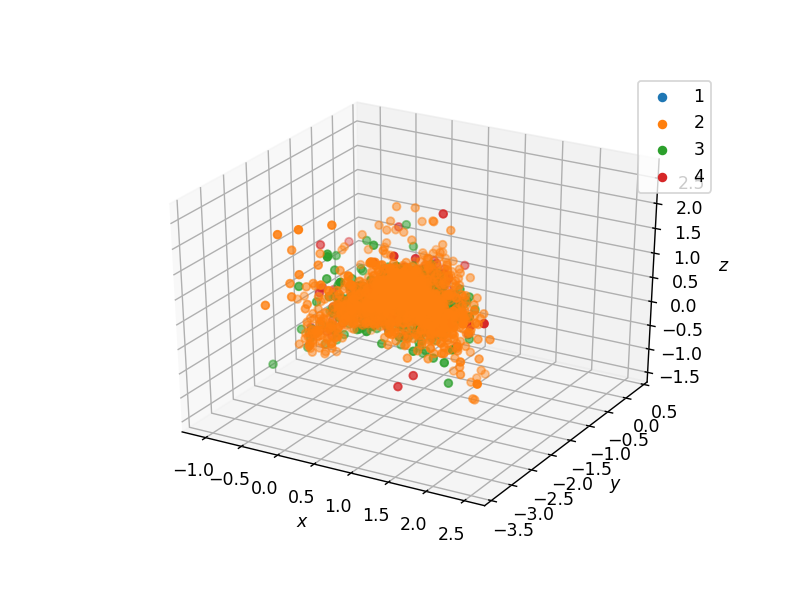

In [9]:
%matplotlib notebook
fig1=plt.figure()
ax=fig1.add_subplot(111,projection='3d')
ax.scatter(df_train_1.x_axis,df_train_1.y_axis,df_train_1.z_axis, label=1)
ax.scatter(df_train_2.x_axis,df_train_2.y_axis,df_train_2.z_axis, label=2)
ax.scatter(df_train_3.x_axis,df_train_3.y_axis,df_train_3.z_axis, label=3)
ax.scatter(df_train_4.x_axis,df_train_4.y_axis,df_train_4.z_axis, label=4)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.legend();

In [10]:
mod=np.array([(df_train.x_axis**2+df_train.y_axis**2+df_train.z_axis**2)**(1/2)]).T
df_train['modul']=mod

<IPython.core.display.Javascript object>


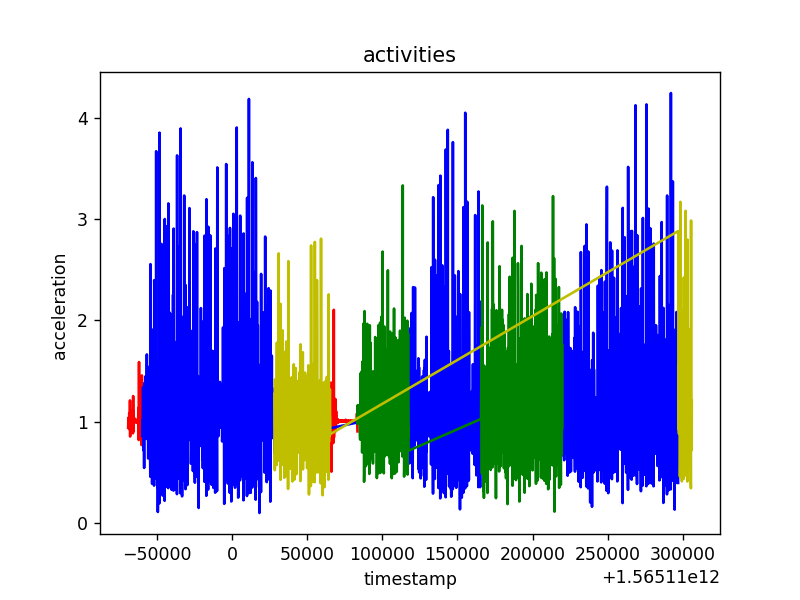

Text(0, 0.5, 'acceleration ')

In [11]:
df_train_1=df_train[df_train.label==1]
df_train_2=df_train[df_train.label==2]
df_train_3=df_train[df_train.label==3]
df_train_4=df_train[df_train.label==4]
plt.figure()
plt.plot(df_train_1.timestamp,df_train_1.modul,'r',df_train_2.timestamp,df_train_2.modul,'b',df_train_3.timestamp,df_train_3.modul,'g',df_train_4.timestamp,df_train_4.modul,'y')
plt.title("activities")
plt.xlabel("timestamp")
plt.ylabel("acceleration ")

<IPython.core.display.Javascript object>


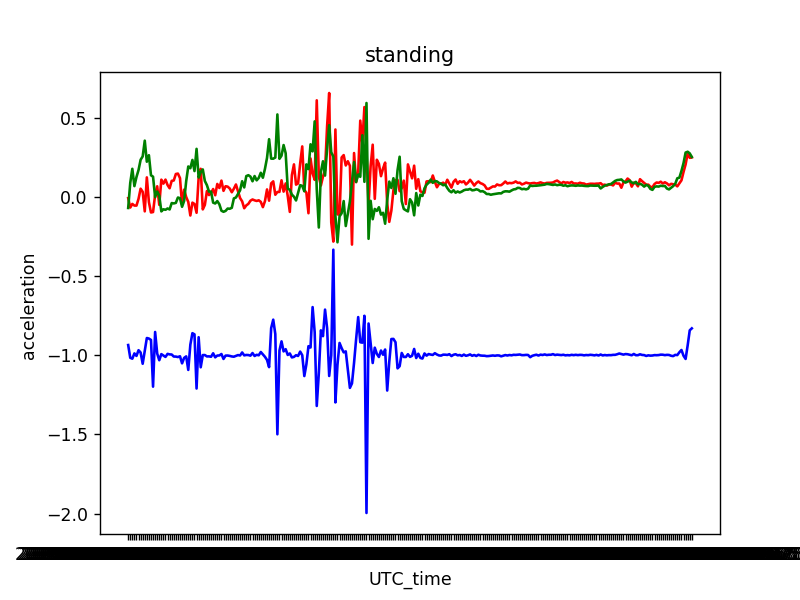

Text(0, 0.5, 'acceleration ')

In [13]:
plt.figure()
plt.plot(df_train.UTC_time[df_train.label==1],df_train.x_axis[df_train.label==1],'r',df_train.UTC_time[df_train.label==1],df_train.y_axis[df_train.label==1],'b',df_train.UTC_time[df_train.label==1],df_train.z_axis[df_train.label==1],'g')
plt.title("standing")
plt.xlabel("UTC_time")
plt.ylabel("acceleration ")

In [14]:
df_train_1=df_train[df_train.label==1].tail(130)

<IPython.core.display.Javascript object>


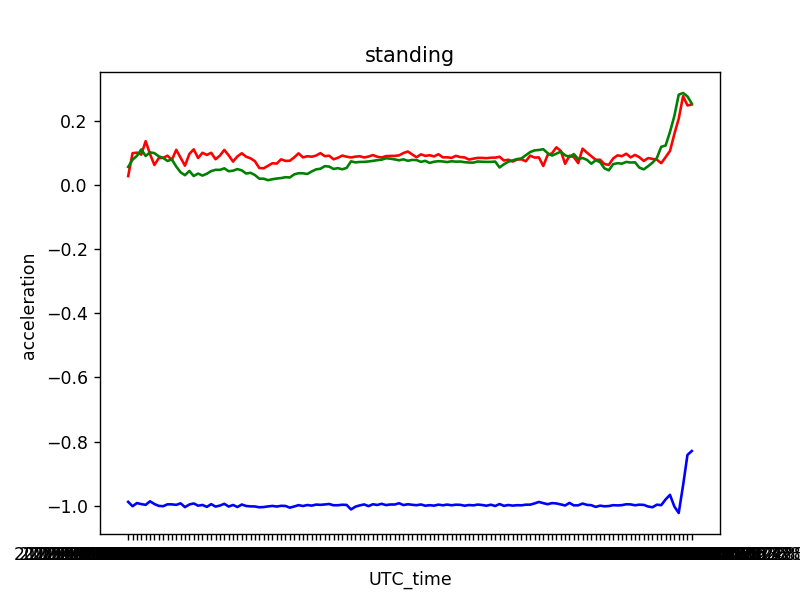

(130, 9)


In [15]:
plt.figure()
plt.plot(df_train_1.UTC_time[df_train_1.label==1],df_train_1.x_axis[df_train_1.label==1],'r',df_train_1.UTC_time[df_train_1.label==1],df_train_1.y_axis[df_train_1.label==1],'b',df_train_1.UTC_time[df_train_1.label==1],df_train_1.z_axis[df_train_1.label==1],'g')
plt.title("standing")
plt.xlabel("UTC_time")
plt.ylabel("acceleration ")
print(df_train_1.shape)

<IPython.core.display.Javascript object>


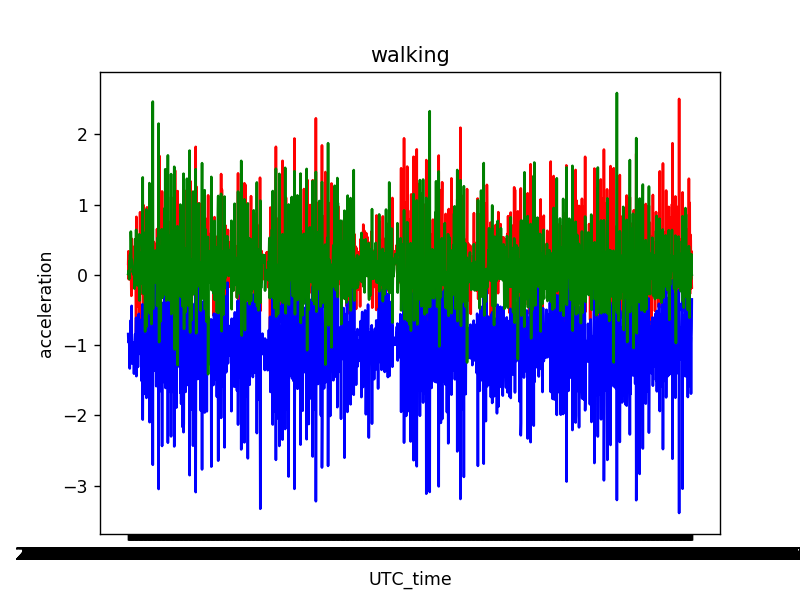

Text(0, 0.5, 'acceleration')

In [17]:
plt.figure()
plt.plot(df_train.UTC_time[df_train.label==2],df_train.x_axis[df_train.label==2],'r',df_train.UTC_time[df_train.label==2],df_train.y_axis[df_train.label==2],'b',df_train.UTC_time[df_train.label==2],df_train.z_axis[df_train.label==2],'g')
plt.title("walking")
plt.xlabel("UTC_time")
plt.ylabel("acceleration")

In [18]:
df_train_2=df_train[df_train.label==2].tail(260)

<IPython.core.display.Javascript object>


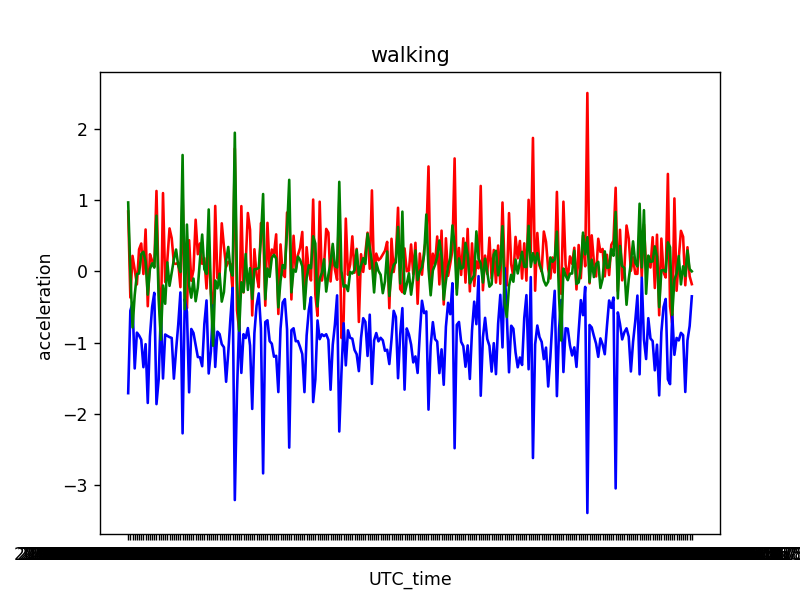

(260, 9)


In [19]:
plt.figure()
plt.plot(df_train_2.UTC_time[df_train_2.label==2],df_train_2.x_axis[df_train_2.label==2],'r',df_train_2.UTC_time[df_train_2.label==2],df_train_2.y_axis[df_train_2.label==2],'b',df_train_2.UTC_time[df_train_2.label==2],df_train_2.z_axis[df_train_2.label==2],'g')
plt.title("walking")
plt.xlabel("UTC_time")
plt.ylabel("acceleration ")
print(df_train_2.shape)

<IPython.core.display.Javascript object>


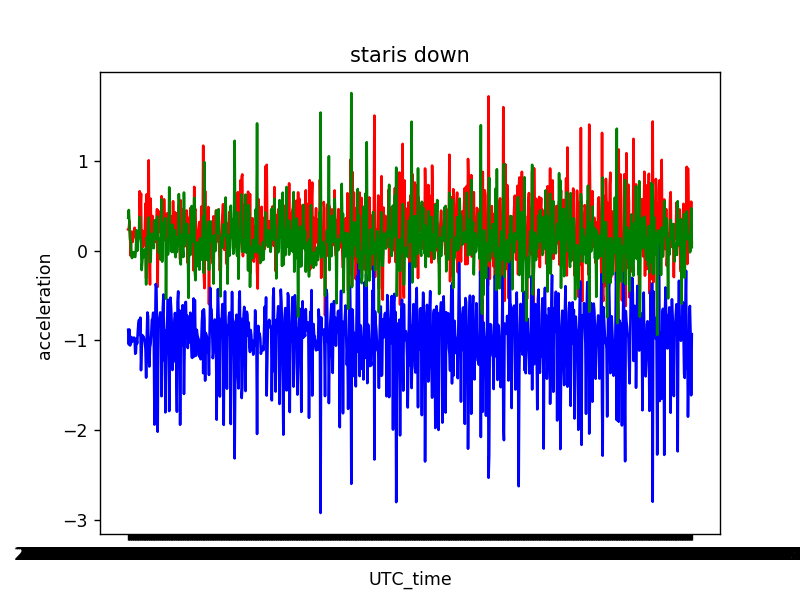

Text(0, 0.5, 'acceleration ')

In [20]:
plt.figure()
plt.plot(df_train.UTC_time[df_train.label==3],df_train.x_axis[df_train.label==3],'r',df_train.UTC_time[df_train.label==3],df_train.y_axis[df_train.label==3],'b',df_train.UTC_time[df_train.label==3],df_train.z_axis[df_train.label==3],'g')
plt.title("staris down")
plt.xlabel("UTC_time")
plt.ylabel("acceleration ")

In [21]:
df_train_3=df_train[df_train.label==3].head(290)

<IPython.core.display.Javascript object>


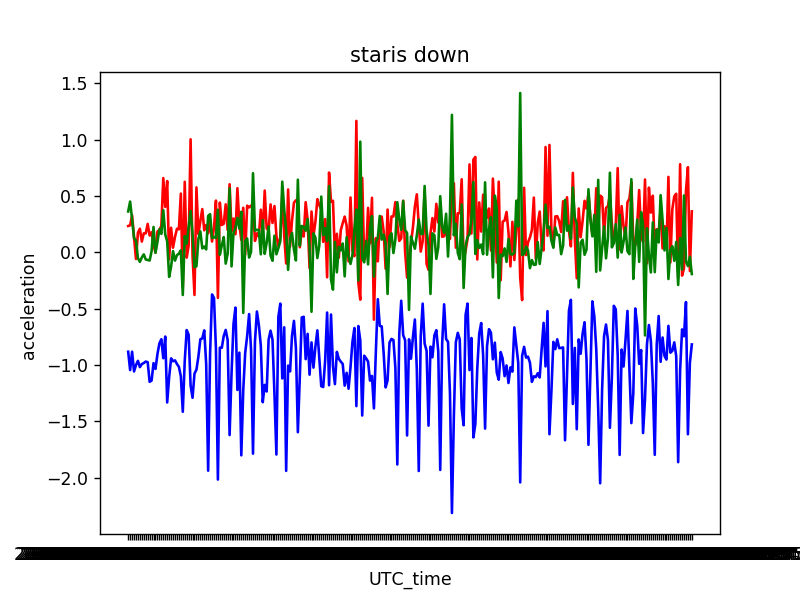

(290, 9)


In [22]:
plt.figure()
plt.plot(df_train_3.UTC_time[df_train_3.label==3],df_train_3.x_axis[df_train_3.label==3],'r',df_train_3.UTC_time[df_train_3.label==3],df_train_3.y_axis[df_train_3.label==3],'b',df_train_3.UTC_time[df_train_3.label==3],df_train_3.z_axis[df_train_3.label==3],'g')
plt.title("staris down")
plt.xlabel("UTC_time")
plt.ylabel("acceleration ")
print(df_train_3.shape)

<IPython.core.display.Javascript object>


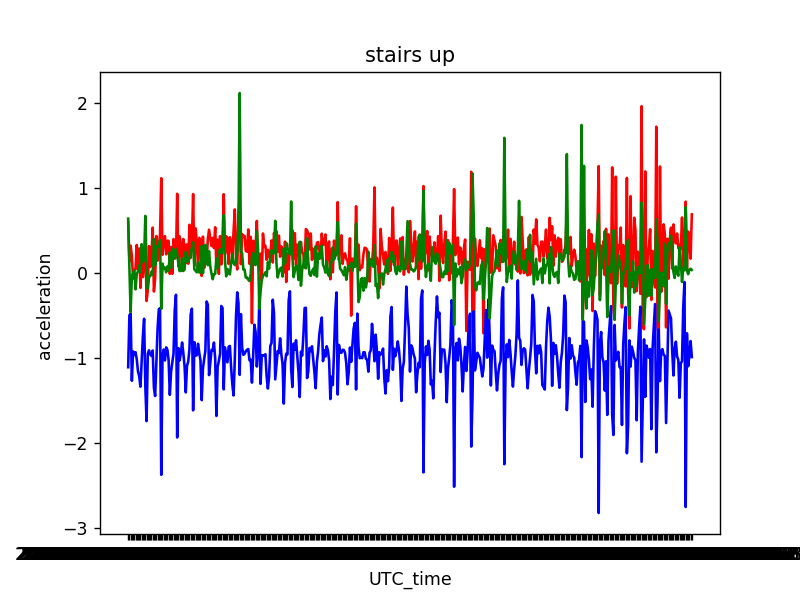

Text(0, 0.5, 'acceleration ')

In [23]:
plt.figure()
plt.plot(df_train.UTC_time[df_train.label==4],df_train.x_axis[df_train.label==4],'r',df_train.UTC_time[df_train.label==4],df_train.y_axis[df_train.label==4],'b',df_train.UTC_time[df_train.label==4],df_train.z_axis[df_train.label==4],'g')
plt.title("stairs up")
plt.xlabel("UTC_time")
plt.ylabel("acceleration ")

In [24]:
df_train_4=df_train[df_train.label==4].head(270)

<IPython.core.display.Javascript object>


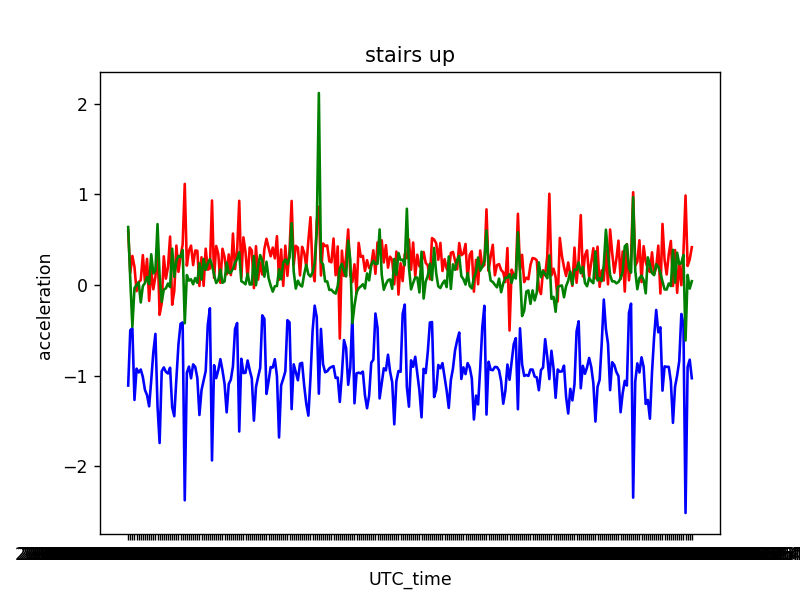

(270, 9)


In [25]:
plt.figure()
plt.plot(df_train_4.UTC_time[df_train_4.label==4],df_train_4.x_axis[df_train_4.label==4],'r',df_train_4.UTC_time[df_train_4.label==4],df_train_4.y_axis[df_train_4.label==4],'b',df_train_4.UTC_time[df_train_4.label==4],df_train_4.z_axis[df_train_4.label==4],'g')
plt.title("stairs up")
plt.xlabel("UTC_time")
plt.ylabel("acceleration ")
print(df_train_4.shape)

In [26]:
X=np.vstack((np.vstack((df_train_1.timestamp,df_train_1.y_axis)).T,np.vstack((df_train_2.timestamp,df_train_2.y_axis)).T,np.vstack((df_train_3.timestamp,df_train_3.y_axis)).T,np.vstack((df_train_4.timestamp,df_train_4.y_axis)).T))
y=np.hstack((np.repeat(1,df_train_1.shape[0]),np.repeat(2,df_train_2.shape[0]),np.repeat(3,df_train_3.shape[0]),np.repeat(4,df_train_4.shape[0])))
X_train, X_test, y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=1)

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear', C=0.05,random_state=0,multi_class='ovr').fit(X_train, y_train)
print("Accuracy on training set is : {}".format(clf.score(X_train, y_train)))
print("Accuracy on test set is : {}".format(clf.score(X_test, y_test)))
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred)) 

Accuracy on training set is : 0.32842105263157895
Accuracy on test set is : 0.28210526315789475
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        76
           2       0.00      0.00      0.00       126
           3       0.28      1.00      0.44       134
           4       0.00      0.00      0.00       139

    accuracy                           0.28       475
   macro avg       0.07      0.25      0.11       475
weighted avg       0.08      0.28      0.12       475



<IPython.core.display.Javascript object>


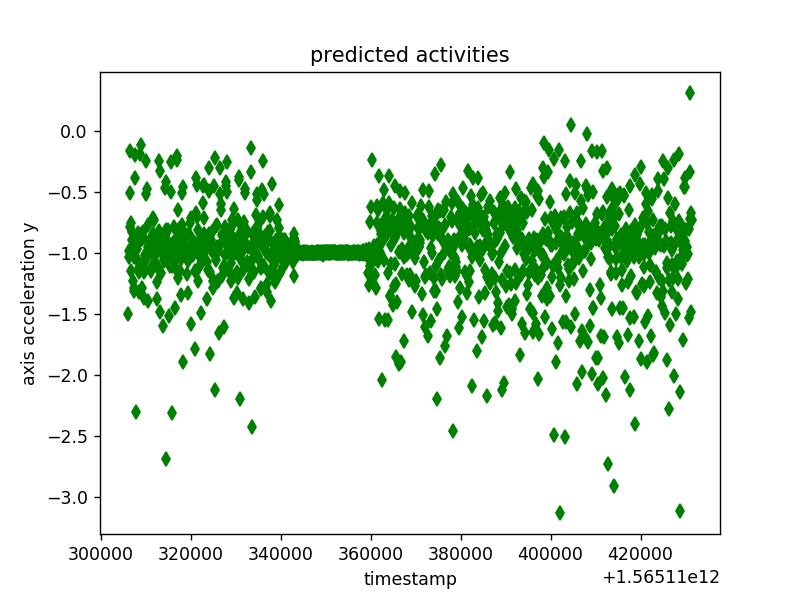

Text(0, 0.5, 'axis acceleration y')

In [28]:
X_questions=np.vstack((np.vstack((df_questions.timestamp,df_questions.y_axis)).T))
y_questions_pred = clf.predict(X_questions)

for i in range(0,df_questions.shape[0]):
    df_questions.label.iloc[i]=y_questions_pred[i]
df_questions_1=df_questions[df_questions.label==1]
df_questions_2=df_questions[df_questions.label==2]
df_questions_3=df_questions[df_questions.label==3]
df_questions_4=df_questions[df_questions.label==4]
plt.figure()
plt.plot(df_questions_1.timestamp,df_questions_1.y_axis,'rd',df_questions_2.timestamp,df_questions_2.y_axis,'bd',df_questions_3.timestamp,df_questions_3.y_axis,'gd',df_questions_4.timestamp,df_questions_4.y_axis,'yd')
plt.title("predicted activities")
plt.xlabel("timestamp")
plt.ylabel("axis acceleration y")

In [29]:
def fourier (df,freq,N):
    n=np.array(df).shape[0]
    x = fft(np.array(df))/n #(I can choose to normalize the transformation dividing between the number of rows)
    dt = 1 / (freq*N)#frequency is the inverse of the time and N is the number of elements in a period
    frq = fftfreq(n, dt)
#    return abs(x),frq
    return x.imag,frq

x1,freq1=fourier(df_train_1["y_axis"],0.1,80)
x2,freq2=fourier(df_train_2["y_axis"],0.1,13)
x3,freq3=fourier(df_train_3["y_axis"],0.1,96)
x4,freq4=fourier(df_train_4["y_axis"],0.1,90)

<IPython.core.display.Javascript object>


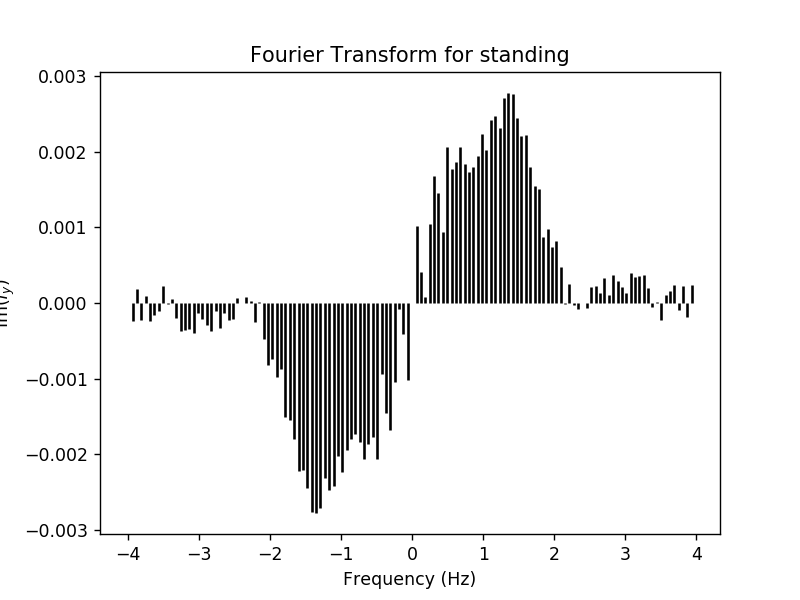

Text(0, 0.5, 'Im($f_y$)')

In [30]:
fig=plt.figure()
plt.vlines(freq1, 0, x1) 
plt.title("Fourier Transform for standing")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Im($f_y$)')

<IPython.core.display.Javascript object>


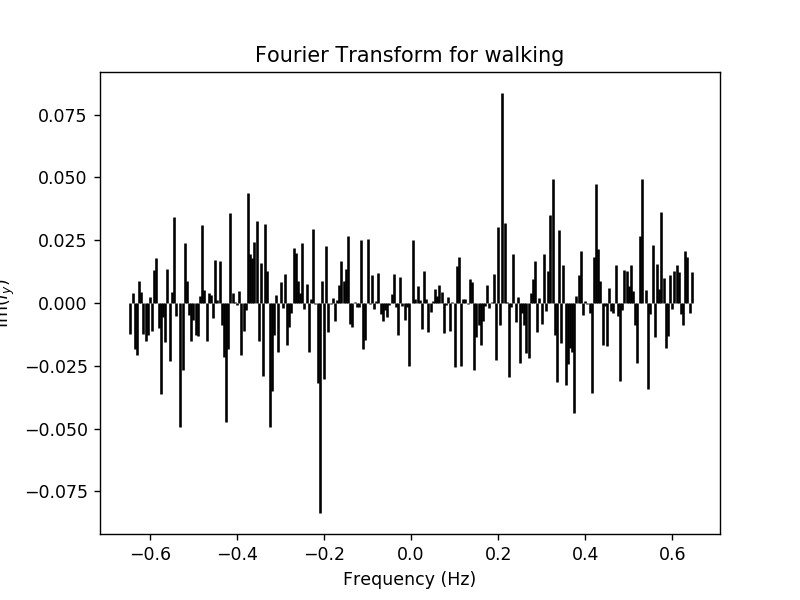

Text(0, 0.5, 'Im($f_y$)')

In [31]:
fig=plt.figure()
plt.vlines(freq2, 0, x2) 
plt.title("Fourier Transform for walking")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Im($f_y$)')

<IPython.core.display.Javascript object>


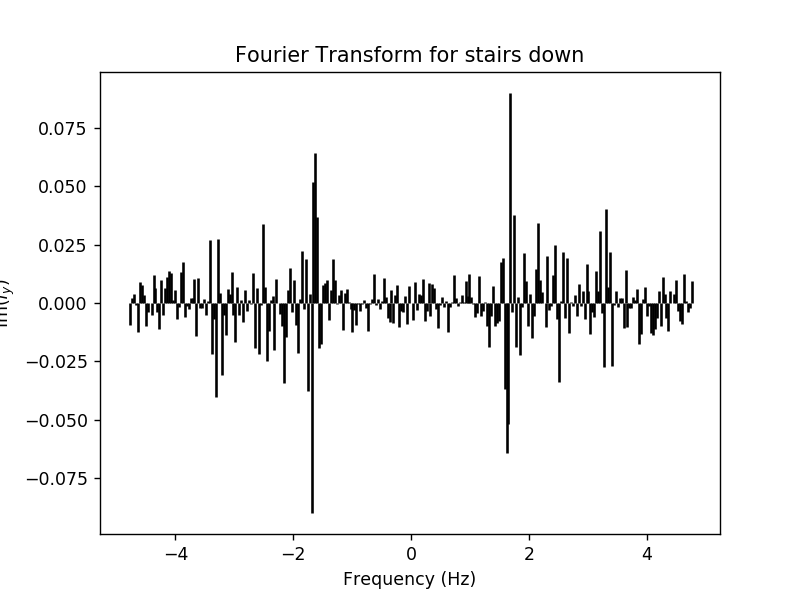

Text(0, 0.5, 'Im($f_y$)')

In [32]:
fig=plt.figure()
plt.vlines(freq3, 0, x3) 
plt.title("Fourier Transform for stairs down")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Im($f_y$)')

<IPython.core.display.Javascript object>


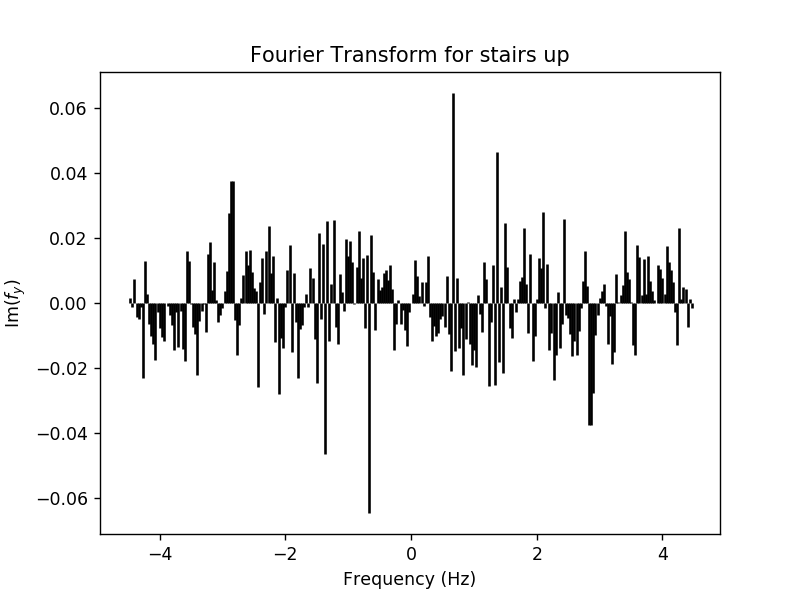

Text(0, 0.5, 'Im($f_y$)')

In [33]:
fig=plt.figure()
plt.vlines(freq4, 0, x4) 
plt.title("Fourier Transform for stairs up")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Im($f_y$)')

In [35]:
X=np.vstack((np.vstack((freq1,x1)).T,np.vstack((freq2,x2)).T,np.vstack((freq3,x3)).T,np.vstack((freq4,x4)).T))
y=np.hstack((np.repeat(1,df_train_1.shape[0]),np.repeat(2,df_train_2.shape[0]),np.repeat(3,df_train_3.shape[0]),np.repeat(4,df_train_4.shape[0])))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=1)

In [36]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print("Accuracy on training set is : {}".format(clf.score(X_train, y_train)))
print("Accuracy on test set is : {}".format(clf.score(X_test, y_test)))
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred)) 

Accuracy on training set is : 0.9978947368421053
Accuracy on test set is : 0.6
              precision    recall  f1-score   support

           1       0.76      0.66      0.70        76
           2       0.74      0.83      0.78       126
           3       0.46      0.52      0.49       134
           4       0.52      0.43      0.47       139

    accuracy                           0.60       475
   macro avg       0.62      0.61      0.61       475
weighted avg       0.60      0.60      0.60       475



In [37]:
xt,freqt=fourier(df_questions["y_axis"],0.1,90)
X_test_questions=np.vstack((np.vstack((freqt,xt)).T))
y_questions_pred = clf.predict(X_test_questions)

In [38]:
for i in range(0,df_questions.shape[0]):
    df_questions.label.iloc[i]=y_questions_pred[i]

df_questions_1=df_questions[df_questions.label==1]
df_questions_2=df_questions[df_questions.label==2]
df_questions_3=df_questions[df_questions.label==3]
df_questions_4=df_questions[df_questions.label==4]

<IPython.core.display.Javascript object>


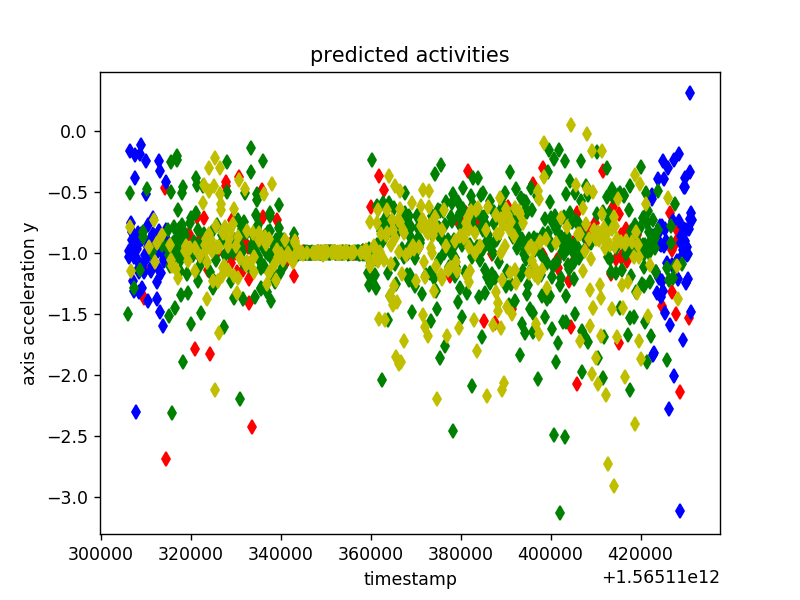

Text(0, 0.5, 'axis acceleration y')

In [39]:
plt.figure()
plt.plot(df_questions_1.timestamp,df_questions_1.y_axis,'rd',df_questions_2.timestamp,df_questions_2.y_axis,'bd',df_questions_3.timestamp,df_questions_3.y_axis,'gd',df_questions_4.timestamp,df_questions_4.y_axis,'yd')
plt.title("predicted activities")
plt.xlabel("timestamp")
plt.ylabel("axis acceleration y")

In [40]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_test_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))

0.5326315789473685
0.84
